# Step 3: Exploratory Data Analysis

## 1. Introduction

   ***Project Goal:*** To develop a model that can predict the number of awards per 100 Full-Time Undergraduates with high accuracy.

   ***Target Variable:*** awards_per_value: The number of awards per 100 full-time undergraduates.

   ***Features:***

   - **chronname:** The name of the college or university.
   - **city:** The city in which the college is located.
   - **state:** The state in which the college is located.
   - **control:** The type of college (public or private).
   - **basic:** A flag indicating whether the college is a basic institution.
   - **hbcu**: A flag indicating whether the college is a historically black college or university.
   - **flagship:** A flag indicating whether the college is a flagship institution.
   - **long_x:** The longitude of the college.
   - **lat_y:** The latitude of the college.
   - **site:** The website of the college.
   - **student_count:** The number of students enrolled at the college.
   - **awards_per_state_value:** The number of awards per 100 full-time undergraduates compared to the state average.
   - **awards_per_natl_value:** The number of awards per 100 full-time undergraduates compared to the national average.
   - **exp_award_value:** The amount of money spent per award.
   - **exp_award_state_value:** The amount of money spent per award compared to the state average.
   - **exp_award_natl_value:** The amount of money spent per award compared to the national average.
   - **exp_award_percentile:** The percentile of the amount of money spent per award compared to other colleges.
   - **ft_pct:** The percentage of full-time students.
   - **fte_value:** The number of full-time equivalent students.
   - **fte_percentile:** The percentile of the number of full-time equivalent students compared to other colleges.
   - **med_sat_value:** Median SAT score among first time students.
   - **med_sat_percentile:** The percentage of SAT scores
   - **aid_value:** The average amount in financial aid.
   - **aid_percentile:** The financial aid percentage.
   - **endow_value:** The endowment values.
   - **endow_percentile:** Percentage in endowment.
   - **grad_100_value:** The number of students who graduated within 100% of normal time.
   - **grad_100_percentile:** The percentage of students who graduated within 100% of normal time.
   - **grad_150_value:** The number of students who graduated within 150% of normal time.
   - **grad_150_percentile:** The percentage of students who graduated within 150% of normal time.
   - **pell_value:** The amount of funds under Pell grant.
   - **pell_percentile:** The percentage of Pell grant.
   - **retain_value:** The number of students retained in the same institution.
   - **retain_percentile:** The retention percentage.
   - **similar:** A flag indicating whether the college is similar to other colleges in the dataset.
   - **state_sector_ct:** The number of colleges in the same state and sector.
   - **carnegie_ct:** The number of colleges in the same Carnegie classification.
   - **counted_pct:** The percentage of students who are counted in the dataset.
   - **cohort_size:** The size of the cohort.

## 2. Imported Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")

## 3. Load Data

In [2]:
data = pd.read_csv('collegedata.csv')

In [3]:
data.shape

(3798, 44)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unitid                  3798 non-null   int64  
 1   chronname               3798 non-null   object 
 2   city                    3798 non-null   object 
 3   state                   3798 non-null   object 
 4   level                   3798 non-null   object 
 5   control                 3798 non-null   object 
 6   basic                   3798 non-null   object 
 7   hbcu                    3798 non-null   object 
 8   flagship                3798 non-null   object 
 9   long_x                  3798 non-null   float64
 10  lat_y                   3798 non-null   float64
 11  site                    3798 non-null   object 
 12  student_count           3798 non-null   int64  
 13  awards_per_value        3798 non-null   float64
 14  awards_per_state_value  3798 non-null   

In [5]:
#Exclude some features from the dataframe
features_to_exclude = ['unitid', 'long_x', 'lat_y', 'site']

#Create a new DataFrame
data_filtered = data.drop(columns=features_to_exclude)
print(data_filtered.shape)

(3798, 40)


## 4. Non-numerical Features

In [6]:
#Identify columns with 'obect' datatype
cols = data_filtered.select_dtypes('object').columns.tolist()
print(cols)

['chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship']


In [7]:
df = data_filtered.select_dtypes('object')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   chronname  3798 non-null   object
 1   city       3798 non-null   object
 2   state      3798 non-null   object
 3   level      3798 non-null   object
 4   control    3798 non-null   object
 5   basic      3798 non-null   object
 6   hbcu       3798 non-null   object
 7   flagship   3798 non-null   object
dtypes: object(8)
memory usage: 237.5+ KB
None


In [8]:
#Count the number of institutions without duplicate names
print(df['chronname'].nunique())

3793


Even though there are no duplicates in the dataframe as evidenced during data wrangling, there seems to be duplicate names. Let us explore further.

In [9]:
#Print institutions with duplicate names.
duplicate_names = df[df.duplicated(subset=['chronname'])]
print(duplicate_names.iloc[:, :5].to_string(index=False)) #Exclude the index from the print out

                      chronname           city       state  level            control
         Metro Business College Jefferson City    Missouri 2-year Private for-profit
ITT Technical Institute-Madison        Madison   Wisconsin 4-year Private for-profit
         Metro Business College         Arnold    Missouri 2-year Private for-profit
ITT Technical Institute-Madison        Madison Mississippi 2-year Private for-profit
                Anamarc College   Santa Teresa  New Mexico 4-year Private for-profit


As we can see, those are all different institutions.

In [10]:
print(df['city'].nunique())

1787


In [11]:
#Display the unique institutional names
print(df['city'].unique())

['Normal' 'Birmingham' 'Montgomery' ... 'Baraga' 'Escondido' 'Edina']


Let us explore further if 'Normal' is a city name. It appears tht there are two cities in different States that are called 'Normal'.

In [12]:
#Select institutions with a city called 'Normal'.
print(df[df['city'] == 'Normal'])

                        chronname    city     state   level control  \
0          Alabama A&M University  Normal   Alabama  4-year  Public   
739     Illinois State University  Normal  Illinois  4-year  Public   
3184  Heartland Community College  Normal  Illinois  2-year  Public   

                                                  basic hbcu flagship  
0     Masters Colleges and Universities--larger prog...    X       no  
739                      Doctoral/Research Universities   no       no  
3184             Associates--Public Rural-serving Large   no       no  


**It is confirmed, there is a city called Normal in Alabama and in Illinois.**

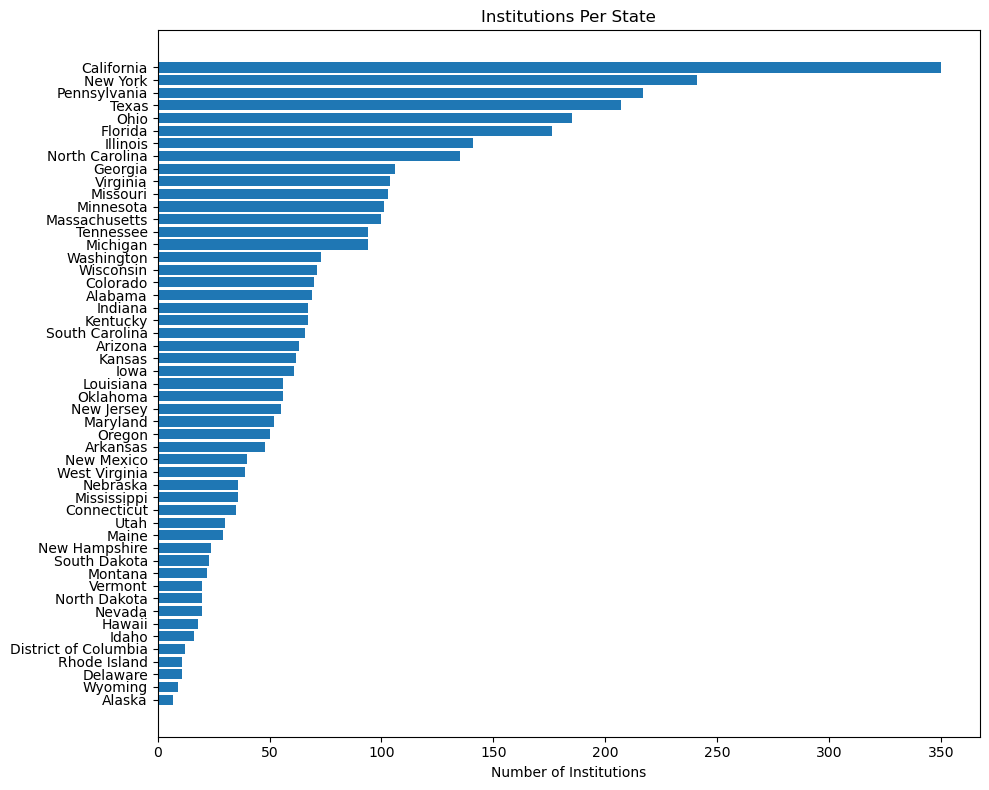

In [13]:
#Count and sort the number of institutions per state
chronname_counts = df.groupby('state')['chronname'].count().sort_values()

#Visualize using a horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(chronname_counts.index, chronname_counts.values)
plt.xlabel('Number of Institutions')
plt.title('Institutions Per State')
plt.tight_layout()
plt.show();

California has the highest (350) number of institutions in the dataset. New York, Pennslyvannia, and Texas have atleast 200 institutions. District of Columbia, Rhode Island, Delaware, Wyoming, and Alaska have the lowest number of institutions.

In [14]:
print(df['level'].unique())

['4-year' '2-year']


In [15]:
df['level'].describe()

count       3798
unique         2
top       4-year
freq        2339
Name: level, dtype: object

   - There are 2339 4-year public and private institutions.
   - The rest are 2-year public or private institutions.

**The distribution of 4-year and 2-year institutions in every state is shown below.**

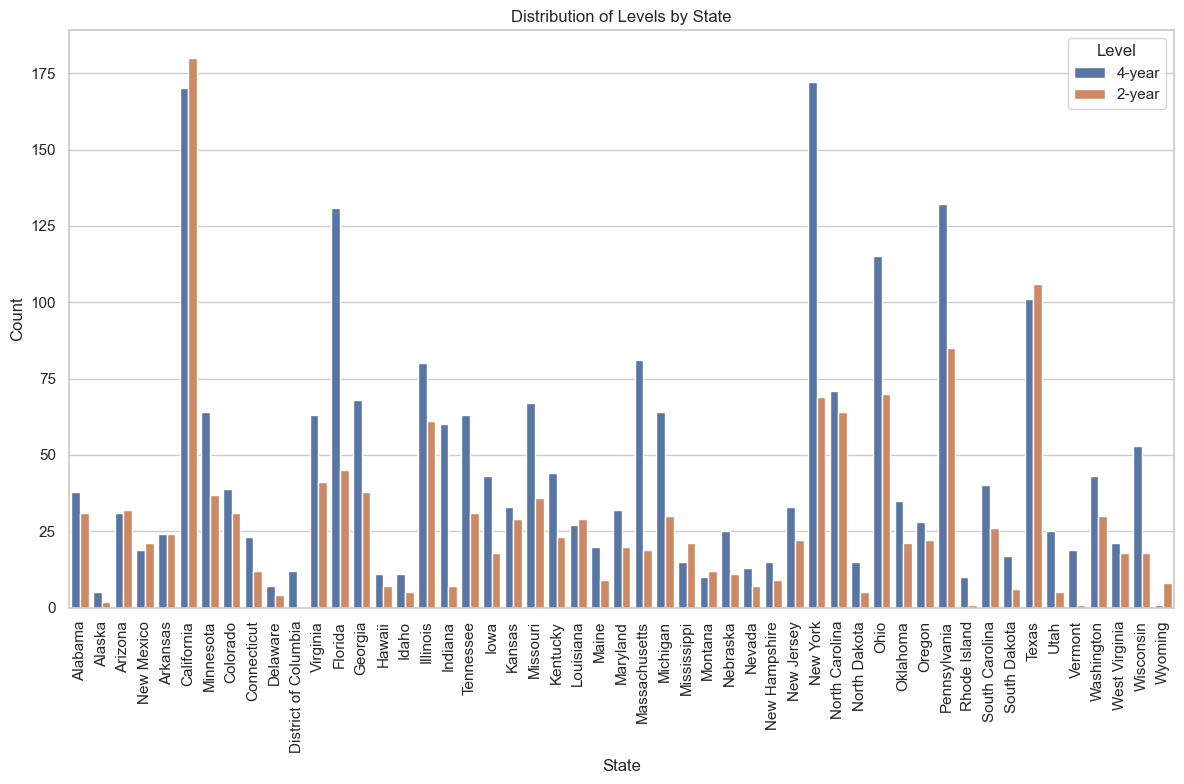

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
#Create a plot
sns.countplot(data=df, x='state', hue='level')

#Display the plot
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Levels by State')
plt.legend(title='Level', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- NY and CA have the highest number 4-year institutions.
- CA has, by far, the highest number of 2-year institutions.
- No 2-year institutions reported from the District of Columbia.
- Rhode Island, Vermont, and Alaska have few reported 2-year institutions.
- Wyoming has the lowest number of 4-year institutions recorded.

In [17]:
#Identify the labels in the 'control' feature
df['control'].unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [18]:
print(df['control'].describe())

count       3798
unique         3
top       Public
freq        1558
Name: control, dtype: object


- There are more Public institutions than Private ones.

**Visualize the distribution of Public, Private not-for-profit, and Private_for-profit institutions in each State.**

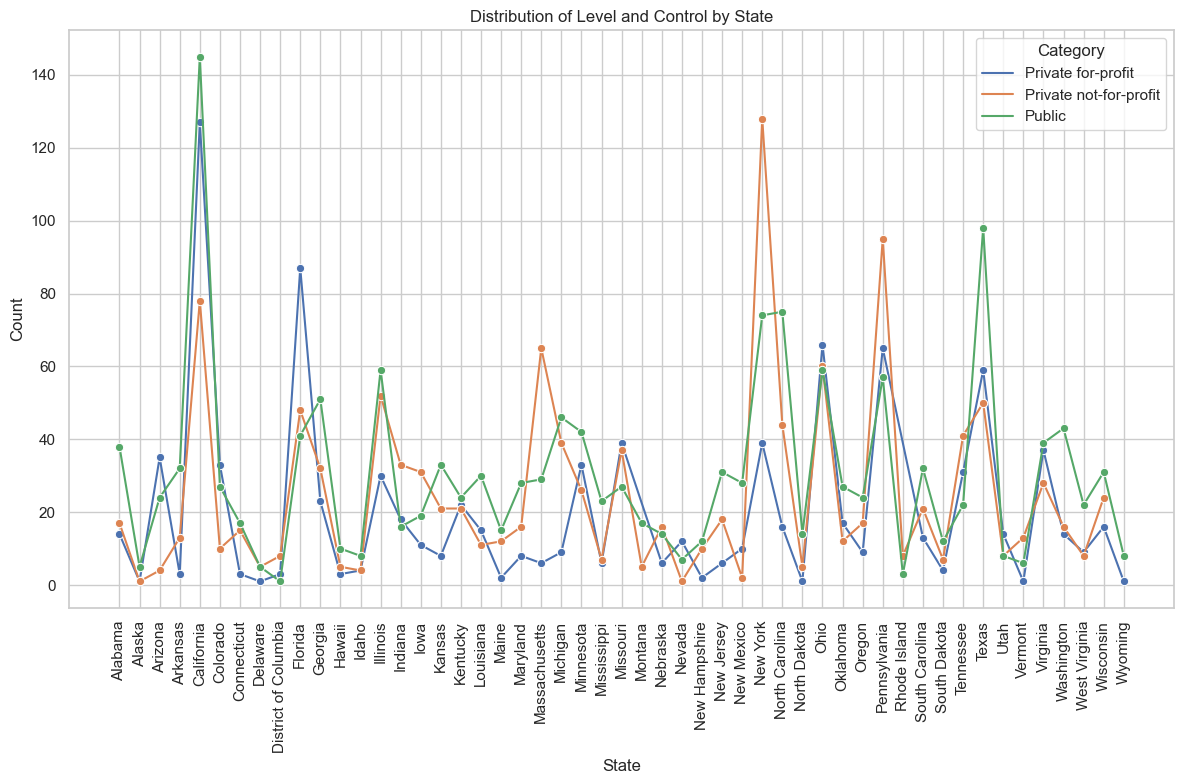

In [19]:
#Group the data per state and control features
grp_data = df.groupby(['state', 'control']).size().reset_index(name='count')

# Create line plots
plt.figure(figsize=(12, 8))

#Create lineplots based on the grouped data
sns.lineplot(x='state', y='count', hue='control', data=grp_data, marker='o')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Level and Control by State')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- The above lineplot is in agreement with the ealier countplot regarding the distribution of various institutions across the States.

In [20]:
print(df['basic'].value_counts())

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [21]:
print(df['hbcu'].value_counts())

hbcu
no    3704
X       94
Name: count, dtype: int64


In [22]:
#Rename the label 'X' to 'yes'
df['hbcu'] = df['hbcu'].replace('X', 'yes')

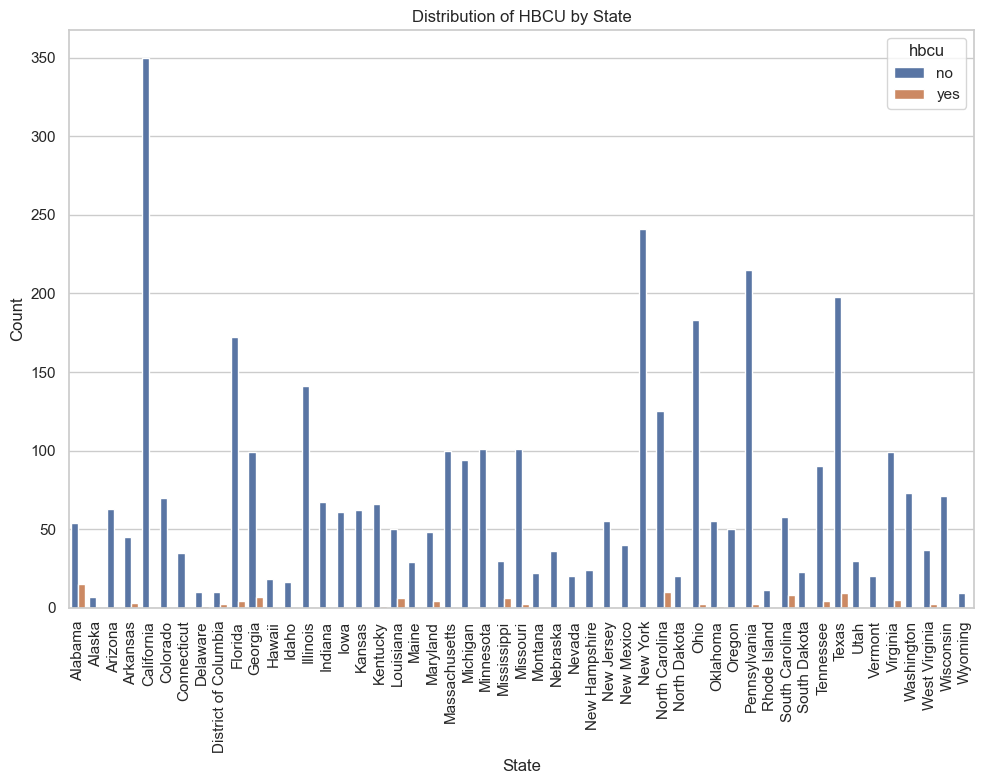

In [23]:
g_data=df.groupby(['state', 'hbcu']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.barplot(x='state', y='count', data=g_data, hue='hbcu')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of HBCU by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [24]:
df.groupby('state')['hbcu'].value_counts().unstack(fill_value=0)

hbcu,no,yes
state,,
Alabama,54,15
Alaska,7,0
Arizona,63,0
Arkansas,45,3
California,350,0
Colorado,70,0
Connecticut,35,0
Delaware,10,1
District of Columbia,10,2


In [25]:
print(df['flagship'].value_counts())

flagship
no    3748
X       50
Name: count, dtype: int64


In [26]:
#Rename the label 'X' to 'yes'
df['flagship'] = df['flagship'].replace('X', 'yes')

In [27]:
df.groupby('state')['flagship'].value_counts().unstack(fill_value=0)

flagship,no,yes
state,,
Alabama,68,1
Alaska,6,1
Arizona,62,1
Arkansas,47,1
California,349,1
Colorado,69,1
Connecticut,34,1
Delaware,10,1
District of Columbia,12,0


## Numerical Columns

In [28]:
df_num = data_filtered.select_dtypes('number')
df_num.head()

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,...,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,state_sector_ct,carnegie_ct,counted_pct,cohort_size,num_similar
0,4051,14.2,18.8,21.5,105331,75743,66436,90,93.8,3906,...,98.0,63.1,17.0,82.8,89.0,13,386,99.7,882.0,20.0
1,11502,20.9,18.8,21.5,136546,75743,66436,97,72.7,10032,...,39.0,80.2,70.0,92.4,98.0,13,106,56.0,1376.0,20.0
2,322,29.9,17.8,22.5,58414,92268,101725,30,62.7,294,...,91.0,37.5,2.0,67.2,71.0,16,252,100.0,3.0,20.0
3,5696,20.9,18.8,21.5,64418,75743,66436,61,74.4,5000,...,32.0,81.0,72.0,65.5,56.0,13,106,43.1,759.0,20.0
4,5356,11.6,18.8,21.5,132407,75743,66436,96,91.0,5035,...,100.0,62.2,15.0,67.0,58.0,13,386,88.0,1351.0,20.0


In [29]:
missing = pd.concat([df_num.isna().sum(), round(100*df_num.isna().mean())], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count', ascending=False)

,Count,%
med_sat_percentile,2461,65.0
med_sat_value,2461,65.0
endow_percentile,1475,39.0
endow_value,1475,39.0
counted_pct,426,11.0
grad_100_percentile,331,9.0
grad_150_value,331,9.0
grad_150_percentile,331,9.0
grad_100_value,331,9.0
cohort_size,331,9.0


In [30]:
df_num.describe()

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,...,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,state_sector_ct,carnegie_ct,counted_pct,cohort_size,num_similar
count,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,...,3798.000000,3535.000000,3535.000000,3798.000000,3798.000000,3798.000000,3798.000000,3372.000000,3467.000000,3798.000000
mean,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,60903.577672,49.919958,71.092198,3716.866772,...,49.895180,66.231853,49.226591,45.107477,49.473448,34.284360,232.557662,57.675919,658.306028,18.846761
std,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,29892.281333,29.054686,25.043616,5998.058385,...,28.924467,17.033907,29.175248,24.684536,28.964490,28.311303,156.960653,25.524881,961.782580,4.662675
min,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,24795.000000,0.000000,3.800000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,37780.000000,25.000000,49.800000,616.250000,...,25.000000,56.100000,24.000000,25.700000,24.250000,14.000000,106.000000,38.100000,131.000000,20.000000
50%,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,38763.000000,50.000000,76.950000,1603.000000,...,50.000000,66.900000,49.000000,41.700000,49.473448,25.000000,169.000000,58.600000,356.000000,20.000000
75%,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,101725.000000,75.000000,93.900000,4190.500000,...,75.000000,78.100000,75.000000,62.900000,75.000000,48.000000,343.000000,77.700000,782.500000,20.000000
max,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,101725.000000,100.000000,100.000000,126411.000000,...,100.000000,100.000000,100.000000,100.000000,99.000000,116.000000,517.000000,150.000000,16229.000000,20.000000


In [31]:
df_num.corr()

,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,...,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,state_sector_ct,carnegie_ct,counted_pct,cohort_size,num_similar
student_count,1.000000,-0.195007,-0.268093,-0.310766,-0.031317,-0.041469,-0.044705,0.011983,-0.200291,0.974339,...,-0.157944,0.116680,0.200913,0.053451,-0.021786,0.041672,-0.209210,-0.147212,0.746736,0.115779
awards_per_value,-0.195007,1.000000,0.547838,0.488051,-0.183489,-0.173671,-0.170328,-0.280216,0.205075,-0.170597,...,-0.011311,0.123903,0.104057,-0.008859,0.040390,-0.108196,0.268275,0.111620,-0.108520,-0.038173
awards_per_state_value,-0.268093,0.547838,1.000000,0.818052,-0.052004,-0.215728,-0.183558,-0.065848,0.419206,-0.222439,...,-0.000613,0.097127,0.021219,0.014317,-0.000674,-0.131800,0.472752,0.279217,-0.159107,-0.082866
awards_per_natl_value,-0.310766,0.488051,0.818052,1.000000,-0.025792,-0.117915,-0.145108,-0.003431,0.523064,-0.252271,...,0.000004,0.109424,-0.008194,0.020177,-0.016009,-0.090373,0.543263,0.364832,-0.196006,-0.140710
exp_award_value,-0.031317,-0.183489,-0.052004,-0.025792,1.000000,0.247555,0.231214,0.365339,0.138866,-0.016881,...,-0.080527,0.099615,0.038064,0.182500,0.113651,0.111850,-0.086876,0.168059,-0.004677,0.020489
exp_award_state_value,-0.041469,-0.173671,-0.215728,-0.117915,0.247555,1.000000,0.804549,0.149848,0.299124,-0.001381,...,-0.066558,0.339087,0.076467,0.240071,-0.024821,0.269235,-0.127638,0.367485,0.019666,0.074062
exp_award_natl_value,-0.044705,-0.170328,-0.183558,-0.145108,0.231214,0.804549,1.000000,0.001964,0.336241,-0.002875,...,-0.000669,0.366703,0.012265,0.332690,0.010989,0.211399,-0.122710,0.387629,-0.021115,0.107954
exp_award_percentile,0.011983,-0.280216,-0.065848,-0.003431,0.365339,0.149848,0.001964,1.000000,0.114372,0.025308,...,-0.151106,0.032832,0.066961,0.135512,0.128343,0.036606,-0.093280,0.191929,0.100144,0.002701
ft_pct,-0.200291,0.205075,0.419206,0.523064,0.138866,0.299124,0.336241,0.114372,1.000000,-0.098277,...,-0.023826,0.391493,0.150797,0.389242,0.243217,-0.011778,0.324484,0.707229,0.034407,0.065984
fte_value,0.974339,-0.170597,-0.222439,-0.252271,-0.016881,-0.001381,-0.002875,0.025308,-0.098277,1.000000,...,-0.157620,0.159536,0.209347,0.111344,0.019341,0.004480,-0.184300,-0.070900,0.791008,0.115472


In [32]:
exclude_pct_cols = ['exp_award_percentile', 'fte_percentile', 'med_sat_percentile', 'aid_percentile', 'endow_percentile', 
            'grad_100_percentile', 'grad_150_percentile', 'pell_percentile', 'retain_percentile', 'ft_fac_percentile']
df_num_filtered = df_num.drop(columns=exclude_pct_cols)

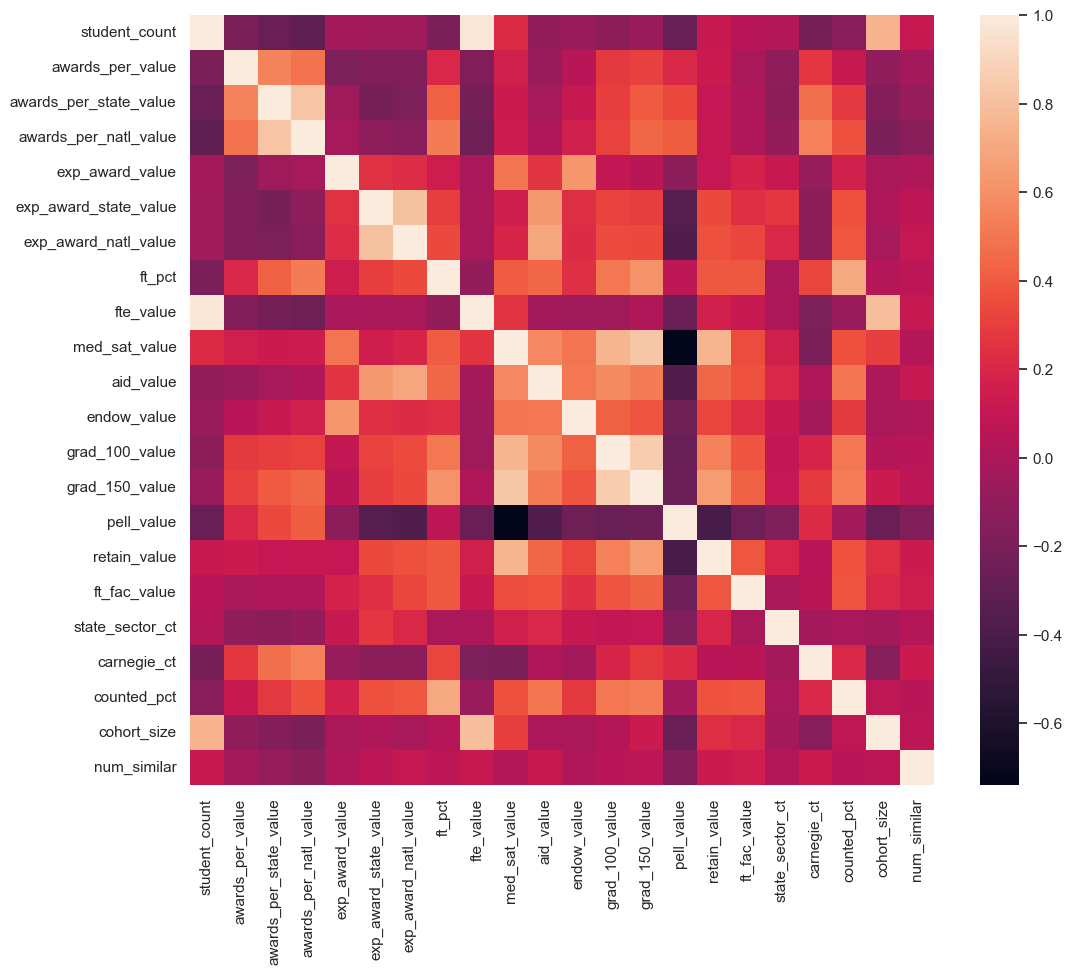

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df_num_filtered.corr())
plt.show();

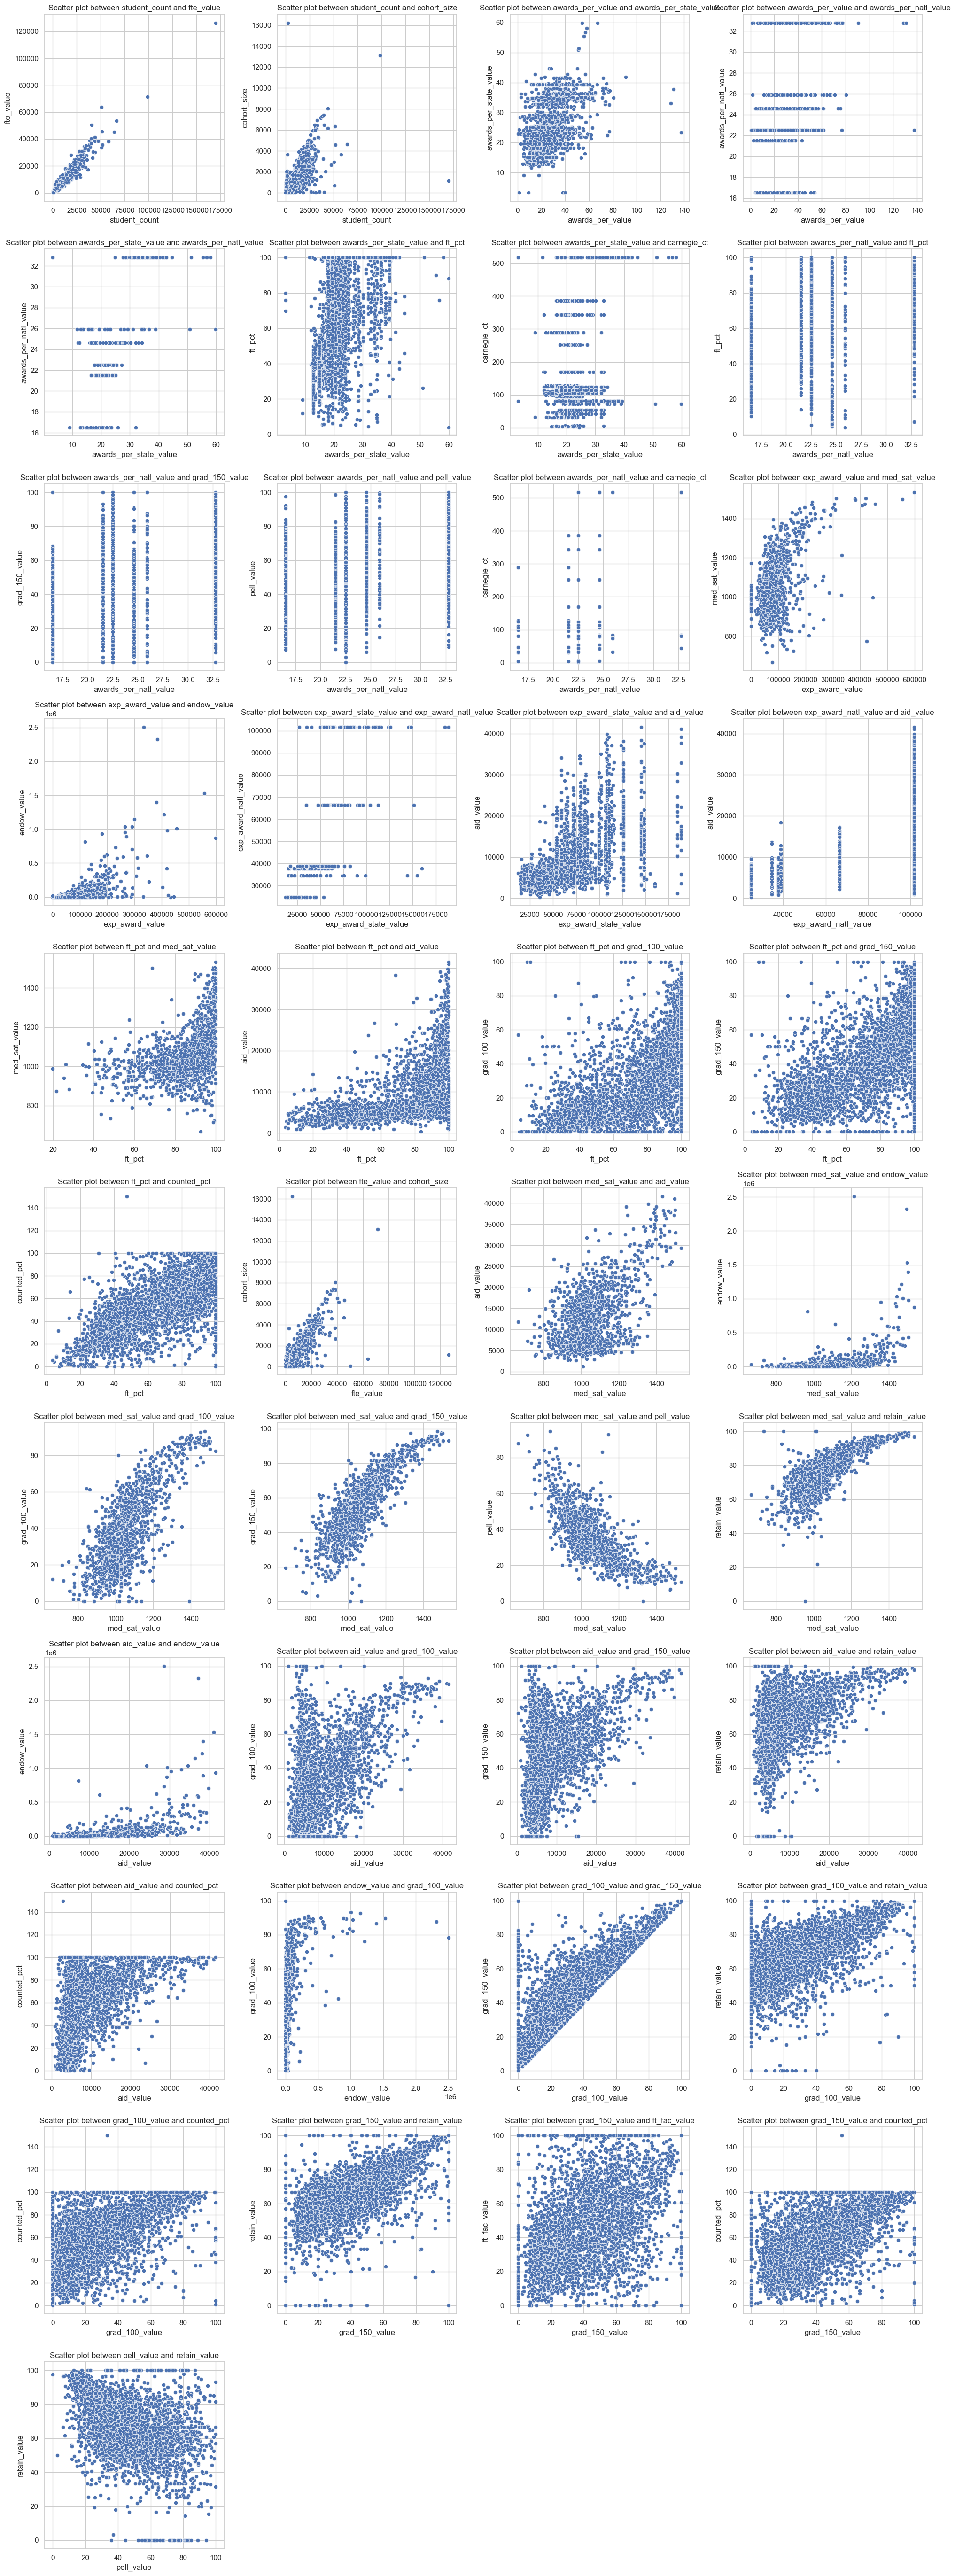

In [34]:
# Calculate the correlation matrix
corr_matrix = df_num_filtered.corr()

# Create a mask to display only the upper triangle
mask = (abs(corr_matrix) >= 0.4) & (corr_matrix != 1) #Filter corr below 0.4 and self-correlations

# Find pairs of columns with correlation >= 0.4
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i in range(len(corr_matrix)) 
                   for j in range(i+1, len(corr_matrix)) 
                   if mask.iloc[i, j]]

# Calculate the number of rows needed to display 4 pairplots
num_rows = (len(high_corr_pairs) + (4 - 1)) // 4

# Plot scatter plots for these pairs
fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

# Flatten the axs array if there's more than one row
if num_rows > 1:
    axs = axs.flatten()

for i, pair in enumerate(high_corr_pairs):
    sns.scatterplot(x=df_num[pair[0]], y=df_num[pair[1]], ax=axs[i])
    axs[i].set_title(f'Scatter plot between {pair[0]} and {pair[1]}')
    axs[i].set_xlabel(pair[0])
    axs[i].set_ylabel(pair[1])

# Remove any unused subplots
for j in range(i + 1, num_rows * 4):
    fig.delaxes(axs[j])
#Display the plots
plt.tight_layout()
plt.show();

#### Combined DataFrames: Non-numeric/Numeric  Features

In [35]:
df_EDAd = pd.concat([df, df_num_filtered], axis=1)
print(df_EDAd.head(2))

                             chronname        city    state   level control  \
0               Alabama A&M University      Normal  Alabama  4-year  Public   
1  University of Alabama at Birmingham  Birmingham  Alabama  4-year  Public   

                                               basic hbcu flagship  \
0  Masters Colleges and Universities--larger prog...  yes       no   
1  Research Universities--very high research acti...   no       no   

   student_count  awards_per_value  ...  grad_100_value  grad_150_value  \
0           4051              14.2  ...            10.0            29.1   
1          11502              20.9  ...            29.4            53.5   

   pell_value  retain_value  ft_fac_value  state_sector_ct  carnegie_ct  \
0        71.2          63.1          82.8               13          386   
1        35.1          80.2          92.4               13          106   

   counted_pct  cohort_size  num_similar  
0         99.7        882.0         20.0  
1         56.

### Save data to a csv file

In [36]:
df_EDAd.to_csv('collegedata_EDAd.csv', index=False)

print("DataFrame saved to 'collegedata_EDAd.csv'")

DataFrame saved to 'collegedata_EDAd.csv'
